<a href="https://www.kaggle.com/code/sidharthshanu/prml-project-naive-bayes-vanilla-and-multinomial?scriptVersionId=173079781" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-analysis-dataset/training.1600000.processed.noemoticon.csv
/kaggle/input/sentiment-analysis-dataset/train.csv
/kaggle/input/sentiment-analysis-dataset/testdata.manual.2009.06.14.csv
/kaggle/input/sentiment-analysis-dataset/test.csv


In [2]:
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/kaggle/input/sentiment-analysis-dataset/train.csv',encoding='unicode_escape')
train_data=df[['text','sentiment']]
train_data.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [4]:
train_data.describe()

,text,sentiment
count,27480,27481
unique,27480,3
top,"I`d have responded, if I were going",neutral
freq,1,11118


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       27480 non-null  object
 1   sentiment  27481 non-null  object
dtypes: object(2)
memory usage: 429.5+ KB


In [6]:
train_data.isna().any()

text          True
sentiment    False
dtype: bool

In [7]:
train_data=train_data.dropna()

In [8]:
train_data.isna().any()

text         False
sentiment    False
dtype: bool

In [9]:
unique_col=train_data['sentiment'].unique()
print(unique_col)

['neutral' 'negative' 'positive']


In [10]:
dict={unique_col[i]: i for i in range(3)}
print(dict)
train_data.replace(dict,inplace=True)    
train_data.head()

{'neutral': 0, 'negative': 1, 'positive': 2}


/tmp/ipykernel_18/2294453797.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data.replace(dict,inplace=True)


,text,sentiment
0,"I`d have responded, if I were going",0
1,Sooo SAD I will miss you here in San Diego!!!,1
2,my boss is bullying me...,1
3,what interview! leave me alone,1
4,"Sons of ****, why couldn`t they put them on t...",1


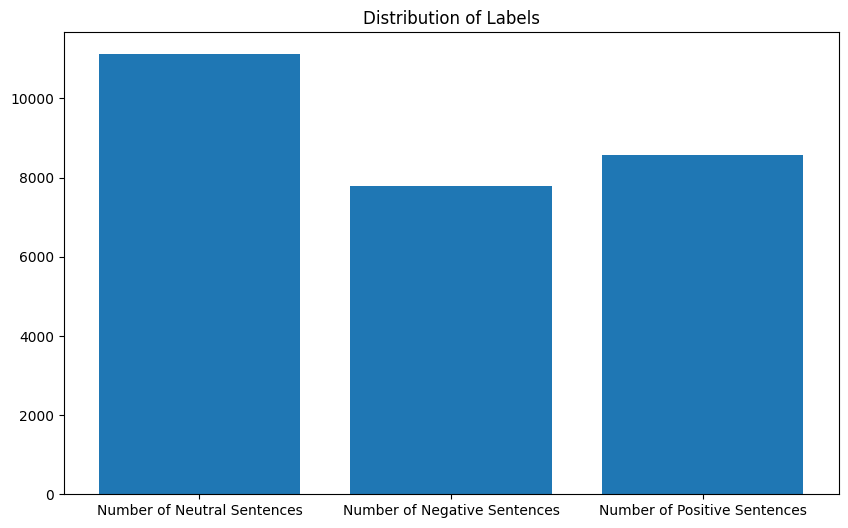

In [11]:
prior_0=len(train_data[train_data["sentiment"] == 0])
prior_1=len(train_data[train_data["sentiment"] == 1])
prior_2=len(train_data[train_data["sentiment"] == 2])

categories = ['Number of Neutral Sentences', 'Number of Negative Sentences', 'Number of Positive Sentences']
values = [prior_0,prior_1,prior_2]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(categories, values)
plt.title('Distribution of Labels')
plt.show()

In [12]:
X=train_data.iloc[:,0].str.split()
y=train_data.iloc[:,1]
print(X)
print(y)

0              [I`d, have, responded,, if, I, were, going]
1        [Sooo, SAD, I, will, miss, you, here, in, San,...
2                          [my, boss, is, bullying, me...]
3                     [what, interview!, leave, me, alone]
4        [Sons, of, ****,, why, couldn`t, they, put, th...
                               ...                        
27476    [wish, we, could, come, see, u, on, Denver, hu...
27477    [I`ve, wondered, about, rake, to., The, client...
27478    [Yay, good, for, both, of, you., Enjoy, the, b...
27479                     [But, it, was, worth, it, ****.]
27480    [All, this, flirting, going, on, -, The, ATG, ...
Name: text, Length: 27480, dtype: object
0        0
1        1
2        1
3        1
4        1
        ..
27476    1
27477    1
27478    2
27479    2
27480    0
Name: sentiment, Length: 27480, dtype: int64


In [13]:
laplace_smoothing_factor=1
unique_words={}
for i in range(X.shape[0]):
    text=X.iloc[i]
    if(type(text) is float ):
        print(i)
        unique_words[str(text)]=1
        continue
    for word in text:
        word=word.lower()
        word=word.replace('.','').replace(',','').replace("'","").replace('0','o')
        if word in unique_words:
            unique_words[word]+=1
        else:
            unique_words[word]=3*laplace_smoothing_factor+1 


In [14]:
probability_0={ key:laplace_smoothing_factor for key in unique_words}
probability_1={ key:laplace_smoothing_factor for key in unique_words}
probability_2={ key:laplace_smoothing_factor for key in unique_words}
for i in range(train_data.shape[0]):
    if(y.iloc[i]== 0):
        text=X.iloc[i]
        if(type(text) is float ):
            probability_0[str(text)]+=1
            continue
        for word in text:
            word=word.lower()
            word=word.replace('.','').replace(',','').replace("'","").replace('0','o')
            probability_0[word]+=1
    elif(y.iloc[i] == 1):
        text=X.iloc[i]
        if(type(text) is float ):
            probability_1[str(text)]+=1
            continue
        for word in text:
            word=word.lower()
            word=word.replace('.','').replace(',','').replace("'","").replace('0','o')
            probability_1[word]+=1
    else:
        text=X.iloc[i]
        if(type(text) is float ):
            probability_2[str(text)]+=1
            continue
        for word in text:
            word=word.lower()
            word=word.replace('.','').replace(',','').replace("'","").replace('0','o')
            probability_2[word]+=1


In [15]:
lf=pd.read_csv('/kaggle/input/sentiment-analysis-dataset/test.csv',encoding='unicode_escape')
test_data=lf[['text','sentiment']]
test_data.head()

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive


In [16]:
test_data=test_data.dropna()

In [17]:
train_data.isna().any()

text         False
sentiment    False
dtype: bool

In [18]:
test_data.replace(dict,inplace=True)    
test_data.head()

/tmp/ipykernel_18/293175770.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data.replace(dict,inplace=True)


,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,0
1,Shanghai is also really exciting (precisely -...,2
2,"Recession hit Veronique Branquinho, she has to...",1
3,happy bday!,2
4,http://twitpic.com/4w75p - I like it!!,2


In [19]:
X_test=test_data.iloc[:,0].str.split()
y_test=np.array(test_data.iloc[:,1])


In [20]:
y_predict=[]
not_known=0
for i in range(X_test.shape[0]):
    p_0=prior_0/(X.shape[0])
    p_1=prior_1/(X.shape[0])
    p_2=prior_2/(X.shape[0])
    text=X_test.iloc[i]
    for word in text:
        word=word.lower()
        word=word.replace('.','').replace(',','').replace("'","").replace('0','o')
        if word in unique_words:
            p_0*=(probability_0[word]/unique_words[word])
            p_1*=(probability_1[word]/unique_words[word])
            p_2*=(probability_2[word]/unique_words[word])
        else:
            not_known+=1
    if(p_1>p_2):
        if(p_1>1.3*len(text)*p_2):
            y_predict.append(1)
        else:
            y_predict.append(0)
    else:
        if(p_2>1.3*len(text)*p_1):
            y_predict.append(2)
        else:
            y_predict.append(0)
print(not_known)

3250


In [21]:
print(accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.642331635540464
              precision    recall  f1-score   support

           0       0.55      0.76      0.64      1430
           1       0.78      0.46      0.58      1001
           2       0.74      0.65      0.69      1103

    accuracy                           0.64      3534
   macro avg       0.69      0.62      0.64      3534
weighted avg       0.68      0.64      0.64      3534



In [22]:
y_predict_1=[]
not_known=0
for i in range(X_test.shape[0]):
    p_0=prior_0/(X.shape[0])
    p_1=prior_1/(X.shape[0])
    p_2=prior_2/(X.shape[0])
    text=X_test.iloc[i]
    for word in text:
        word=word.lower()
        word=word.replace('.','').replace(',','').replace("'","").replace('0','o')
        if word in unique_words:
            p_0*=(probability_0[word]/unique_words[word])
            p_1*=(probability_1[word]/unique_words[word])
            p_2*=(probability_2[word]/unique_words[word])
        else:
            not_known+=1
    if(p_0>max(p_1,p_2)):
        y_predict_1.append(0)
    elif(p_1>p_2):
        y_predict_1.append(1)
    else:
        y_predict_1.append(2)
print(not_known)

3250


In [23]:
print(accuracy_score(y_test,y_predict_1))
print(classification_report(y_test,y_predict_1))

0.5758347481607244
              precision    recall  f1-score   support

           0       0.49      0.94      0.64      1430
           1       0.85      0.23      0.36      1001
           2       0.86      0.42      0.57      1103

    accuracy                           0.58      3534
   macro avg       0.74      0.53      0.52      3534
weighted avg       0.71      0.58      0.54      3534



Multinomial Naive Bayes

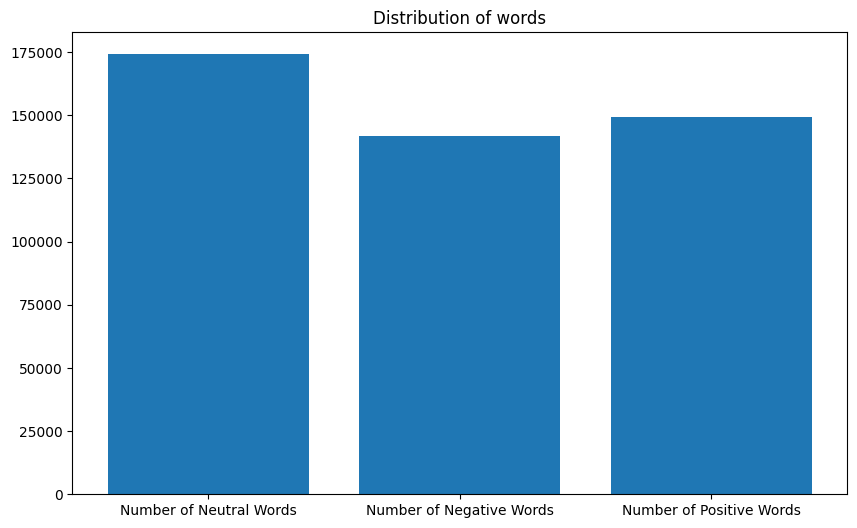

In [24]:
Count_words_0=0
Count_words_1=0
Count_words_2=0
for key in probability_0:
    Count_words_0+=probability_0[key]
for key in probability_1:
    Count_words_1+=probability_1[key]
for key in probability_2:
    Count_words_2+=probability_2[key]

categories = ['Number of Neutral Words', 'Number of Negative Words', 'Number of Positive Words']
values = [Count_words_0,Count_words_1,Count_words_2]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(categories, values)
plt.title('Distribution of words')
plt.show()

In [25]:
Multinomial_prob_0={key: (np.log(probability_0[key])-np.log(Count_words_0)) for key in probability_0}
Multinomial_prob_1={key: (np.log(probability_1[key])-np.log(Count_words_1)) for key in probability_0}
Multinomial_prob_2={key: (np.log(probability_2[key])-np.log(Count_words_2)) for key in probability_0}

In [26]:
y_predict_multi=[]
not_known=0
for i in range(X_test.shape[0]):
    p_0=np.log(prior_0)-np.log(X.shape[0])
    p_1=np.log(prior_0)-np.log(X.shape[0])
    p_2=np.log(prior_0)-np.log(X.shape[0])
    text=X_test.iloc[i]
    for word in text:
        word=word.lower()
        word=word.replace('.','').replace(',','').replace("'","").replace('0','o')
        if word in unique_words:
            p_0+=Multinomial_prob_0[word]
            p_1+=Multinomial_prob_1[word]
            p_2+=Multinomial_prob_2[word]
        else:
            not_known+=1
    if(p_0>max(p_1,p_2)):
        y_predict_multi.append(0)
    elif(p_1>p_2):
        y_predict_multi.append(1)
    else:
        y_predict_multi.append(2)
print(not_known)

3250


In [27]:
print(accuracy_score(y_test,y_predict_multi))
print(classification_report(y_test,y_predict_multi))

0.6392190152801358
              precision    recall  f1-score   support

           0       0.59      0.60      0.60      1430
           1       0.64      0.65      0.65      1001
           2       0.70      0.67      0.69      1103

    accuracy                           0.64      3534
   macro avg       0.65      0.64      0.64      3534
weighted avg       0.64      0.64      0.64      3534



New Try with selected text being a value instead of text

In [28]:
train_data_sel=df[['selected_text','sentiment']]
train_data_sel.head()

,selected_text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD,negative
2,bullying me,negative
3,leave me alone,negative
4,"Sons of ****,",negative


In [29]:
train_data_sel.isna().any()

selected_text     True
sentiment        False
dtype: bool

In [30]:
train_data_sel=train_data_sel.dropna()

In [31]:
train_data_sel.isna().any()

selected_text    False
sentiment        False
dtype: bool

In [32]:
train_data_sel.replace(dict,inplace=True)    
train_data_sel.head()

/tmp/ipykernel_18/1720062917.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data_sel.replace(dict,inplace=True)


,selected_text,sentiment
0,"I`d have responded, if I were going",0
1,Sooo SAD,1
2,bullying me,1
3,leave me alone,1
4,"Sons of ****,",1


In [33]:
X_sel=train_data_sel.iloc[:,0].str.split()
y_sel=train_data_sel.iloc[:,1]

In [34]:
laplace_smoothing_factor=1
unique_words_sel={}
for i in range(X_sel.shape[0]):
    text=X_sel.iloc[i]
    if(type(text) is float ):
        print(i)
        unique_words[str(text)]=1
        continue
    for word in text:
        word=word.lower()
        word=word.replace('.','').replace(',','').replace("'","").replace('0','o')
        if word in unique_words_sel:
            unique_words_sel[word]+=1
        else:
            unique_words_sel[word]=3*laplace_smoothing_factor+1 

print("done")

7975
14520
21247
25956
done


In [35]:
probability_sel_0={ key:laplace_smoothing_factor for key in unique_words_sel} 
probability_sel_1={ key:laplace_smoothing_factor for key in unique_words_sel} 
probability_sel_2={ key:laplace_smoothing_factor for key in unique_words_sel} 

for i in range(train_data_sel.shape[0]): 
    if(y_sel.iloc[i]== 0): 
        text=X_sel.iloc[i] 
        if(type(text) is float ): 
            probability_sel_0[str(text)]+=1 
            continue 
        for word in text: 
            word=word.lower() 
            word=word.replace('.','').replace(',','').replace("'","").replace('0','o') 
            probability_sel_0[word]+=1 
    elif(y_sel.iloc[i] == 1): 
        text=X_sel.iloc[i] 
        if(type(text) is float ): 
            probability_sel_1[str(text)]+=1 
            continue 
        for word in text: 
            word=word.lower() 
            word=word.replace('.','').replace(',','').replace("'","").replace('0','o') 
            probability_sel_1[word]+=1 
    else: 
        text=X_sel.iloc[i] 
        if(type(text) is float ): 
            probability_sel_2[str(text)]+=1 
            continue 
        for word in text: 
            word=word.lower() 
            word=word.replace('.','').replace(',','').replace("'","").replace('0','o') 
            probability_sel_2[word]+=1 

In [36]:
y_predict_sel=[]
not_known=0
for i in range(X_test.shape[0]):
    p_0=prior_0/(X_sel.shape[0])
    p_1=prior_1/(X_sel.shape[0])
    p_2=prior_2/(X_sel.shape[0])
    text=X_test.iloc[i]
    for word in text:
        word=word.lower()
        word=word.replace('.','').replace(',','').replace("'","").replace('0','o')
        if word in unique_words_sel:
            p_0*=(probability_sel_0[word]/unique_words_sel[word])
            p_1*=(probability_sel_1[word]/unique_words_sel[word])
            p_2*=(probability_sel_2[word]/unique_words_sel[word])
        else:
            not_known+=1
    if(p_1>p_2):
        if(p_1>2*len(text)*p_2):
            y_predict_sel.append(1)
        else:
            y_predict_sel.append(0)
    else:
        if(p_2>2*len(text)*p_1):
            y_predict_sel.append(2)
        else:
            y_predict_sel.append(0)
print(not_known)

3955


In [37]:
print(accuracy_score(y_test,y_predict_sel))
print(classification_report(y_test,y_predict_sel))

0.6428975664968873
              precision    recall  f1-score   support

           0       0.56      0.71      0.63      1430
           1       0.64      0.68      0.66      1001
           2       0.86      0.53      0.66      1103

    accuracy                           0.64      3534
   macro avg       0.69      0.64      0.65      3534
weighted avg       0.68      0.64      0.64      3534



In [38]:
y_predict_sel_1=[]
not_known=0
for i in range(X_test.shape[0]):
    p_0=1
    p_1=1
    p_2=1
    text=X_test.iloc[i]
    for word in text:
        word=word.lower()
        word=word.replace('.','').replace(',','').replace("'","").replace('0','o')
        if word in unique_words_sel:
            p_0*=(probability_sel_0[word]/unique_words_sel[word])
            p_1*=(probability_sel_1[word]/unique_words_sel[word])
            p_2*=(probability_sel_2[word]/unique_words_sel[word])
        else:
            not_known+=1
    if(p_0>max(p_1,p_2)):
        y_predict_sel_1.append(0)
    elif(p_1>p_2):
        y_predict_sel_1.append(1)
    else:
        y_predict_sel_1.append(2)
print(not_known)

3955


In [39]:
print(accuracy_score(y_test,y_predict_sel_1))
print(classification_report(y_test,y_predict_sel_1))

0.4204867006225241
              precision    recall  f1-score   support

           0       0.41      0.99      0.58      1430
           1       0.91      0.02      0.04      1001
           2       0.76      0.05      0.09      1103

    accuracy                           0.42      3534
   macro avg       0.69      0.35      0.24      3534
weighted avg       0.66      0.42      0.27      3534



Multinomial naive bayes

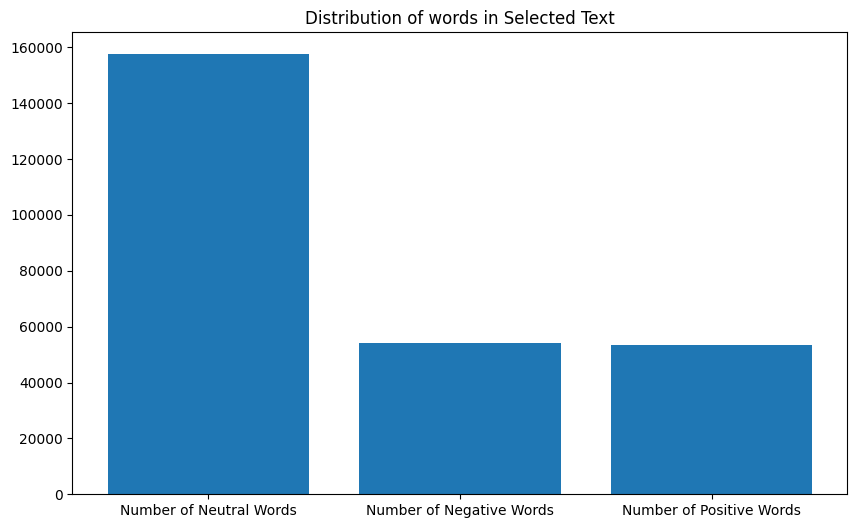

In [40]:
Count_words_sel_0=0
Count_words_sel_1=0
Count_words_sel_2=0
for key in probability_sel_0:
    Count_words_sel_0+=probability_sel_0[key]
for key in probability_sel_1:
    Count_words_sel_1+=probability_sel_1[key]
for key in probability_sel_2:
    Count_words_sel_2+=probability_sel_2[key]
categories = ['Number of Neutral Words', 'Number of Negative Words', 'Number of Positive Words']
values = [Count_words_sel_0,Count_words_sel_1,Count_words_sel_2]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(categories, values)
plt.title('Distribution of words in Selected Text')
plt.show()

In [41]:
Multinomial_prob_sel_0={key: (np.log(probability_sel_0[key])-np.log(Count_words_sel_0)) for key in probability_sel_0}
Multinomial_prob_sel_1={key: (np.log(probability_sel_1[key])-np.log(Count_words_sel_1)) for key in probability_sel_0}
Multinomial_prob_sel_2={key: (np.log(probability_sel_2[key])-np.log(Count_words_sel_2)) for key in probability_sel_0}

In [42]:
y_predict_multi_sel=[]
not_known=0
for i in range(X_test.shape[0]):
    p_0=np.log(prior_0)-np.log(X.shape[0])
    p_1=np.log(prior_0)-np.log(X.shape[0])
    p_2=np.log(prior_0)-np.log(X.shape[0])
    text=X_test.iloc[i]
    for word in text:
        word=word.lower()
        word=word.replace('.','').replace(',','').replace("'","").replace('0','o')
        if word in unique_words_sel:
            p_0+=Multinomial_prob_sel_0[word]
            p_1+=Multinomial_prob_sel_1[word]
            p_2+=Multinomial_prob_sel_2[word]
        else:
            not_known+=1
    if(p_0>max(p_1,p_2)):
        y_predict_multi_sel.append(0)
    elif(p_1>p_2):
        y_predict_multi_sel.append(1)
    else:
        y_predict_multi_sel.append(2)
print(not_known)

3955


In [43]:
print(accuracy_score(y_test,y_predict_multi_sel))
print(classification_report(y_test,y_predict_multi_sel))

0.5432937181663837
              precision    recall  f1-score   support

           0       0.47      0.92      0.62      1430
           1       0.78      0.26      0.39      1001
           2       0.83      0.31      0.45      1103

    accuracy                           0.54      3534
   macro avg       0.69      0.50      0.49      3534
weighted avg       0.67      0.54      0.50      3534



In [44]:
print(f'The accuracy Score for Vanilla Naive Bayes on Text {accuracy_score(y_test,y_predict_1)}')
print(classification_report(y_test,y_predict_1))

print(f'The accuracy Score for Vanilla Naive Bayes on Text with changes {accuracy_score(y_test,y_predict)}')
print(classification_report(y_test,y_predict))

print(f'The accuracy Score for Vanilla Naive Bayes on Selected Text {accuracy_score(y_test,y_predict_sel_1)}')
print(classification_report(y_test,y_predict_sel_1))

print(f'The accuracy Score for Vanilla Naive Bayes on Selected Text with changes {accuracy_score(y_test,y_predict_sel)}')
print(classification_report(y_test,y_predict_sel))

print(f'The accuracy Score for Multinomial Naive Bayes on Text {accuracy_score(y_test,y_predict_multi)}')
print(classification_report(y_test,y_predict_multi))

print(f'The accuracy Score for Multinomial Naive Bayes on Selected Text {accuracy_score(y_test,y_predict_multi_sel)}')
print(classification_report(y_test,y_predict_multi_sel))

The accuracy Score for Vanilla Naive Bayes on Text 0.5758347481607244
              precision    recall  f1-score   support

           0       0.49      0.94      0.64      1430
           1       0.85      0.23      0.36      1001
           2       0.86      0.42      0.57      1103

    accuracy                           0.58      3534
   macro avg       0.74      0.53      0.52      3534
weighted avg       0.71      0.58      0.54      3534

The accuracy Score for Vanilla Naive Bayes on Text with changes 0.642331635540464
              precision    recall  f1-score   support

           0       0.55      0.76      0.64      1430
           1       0.78      0.46      0.58      1001
           2       0.74      0.65      0.69      1103

    accuracy                           0.64      3534
   macro avg       0.69      0.62      0.64      3534
weighted avg       0.68      0.64      0.64      3534

The accuracy Score for Vanilla Naive Bayes on Selected Text 0.4204867006225241
       

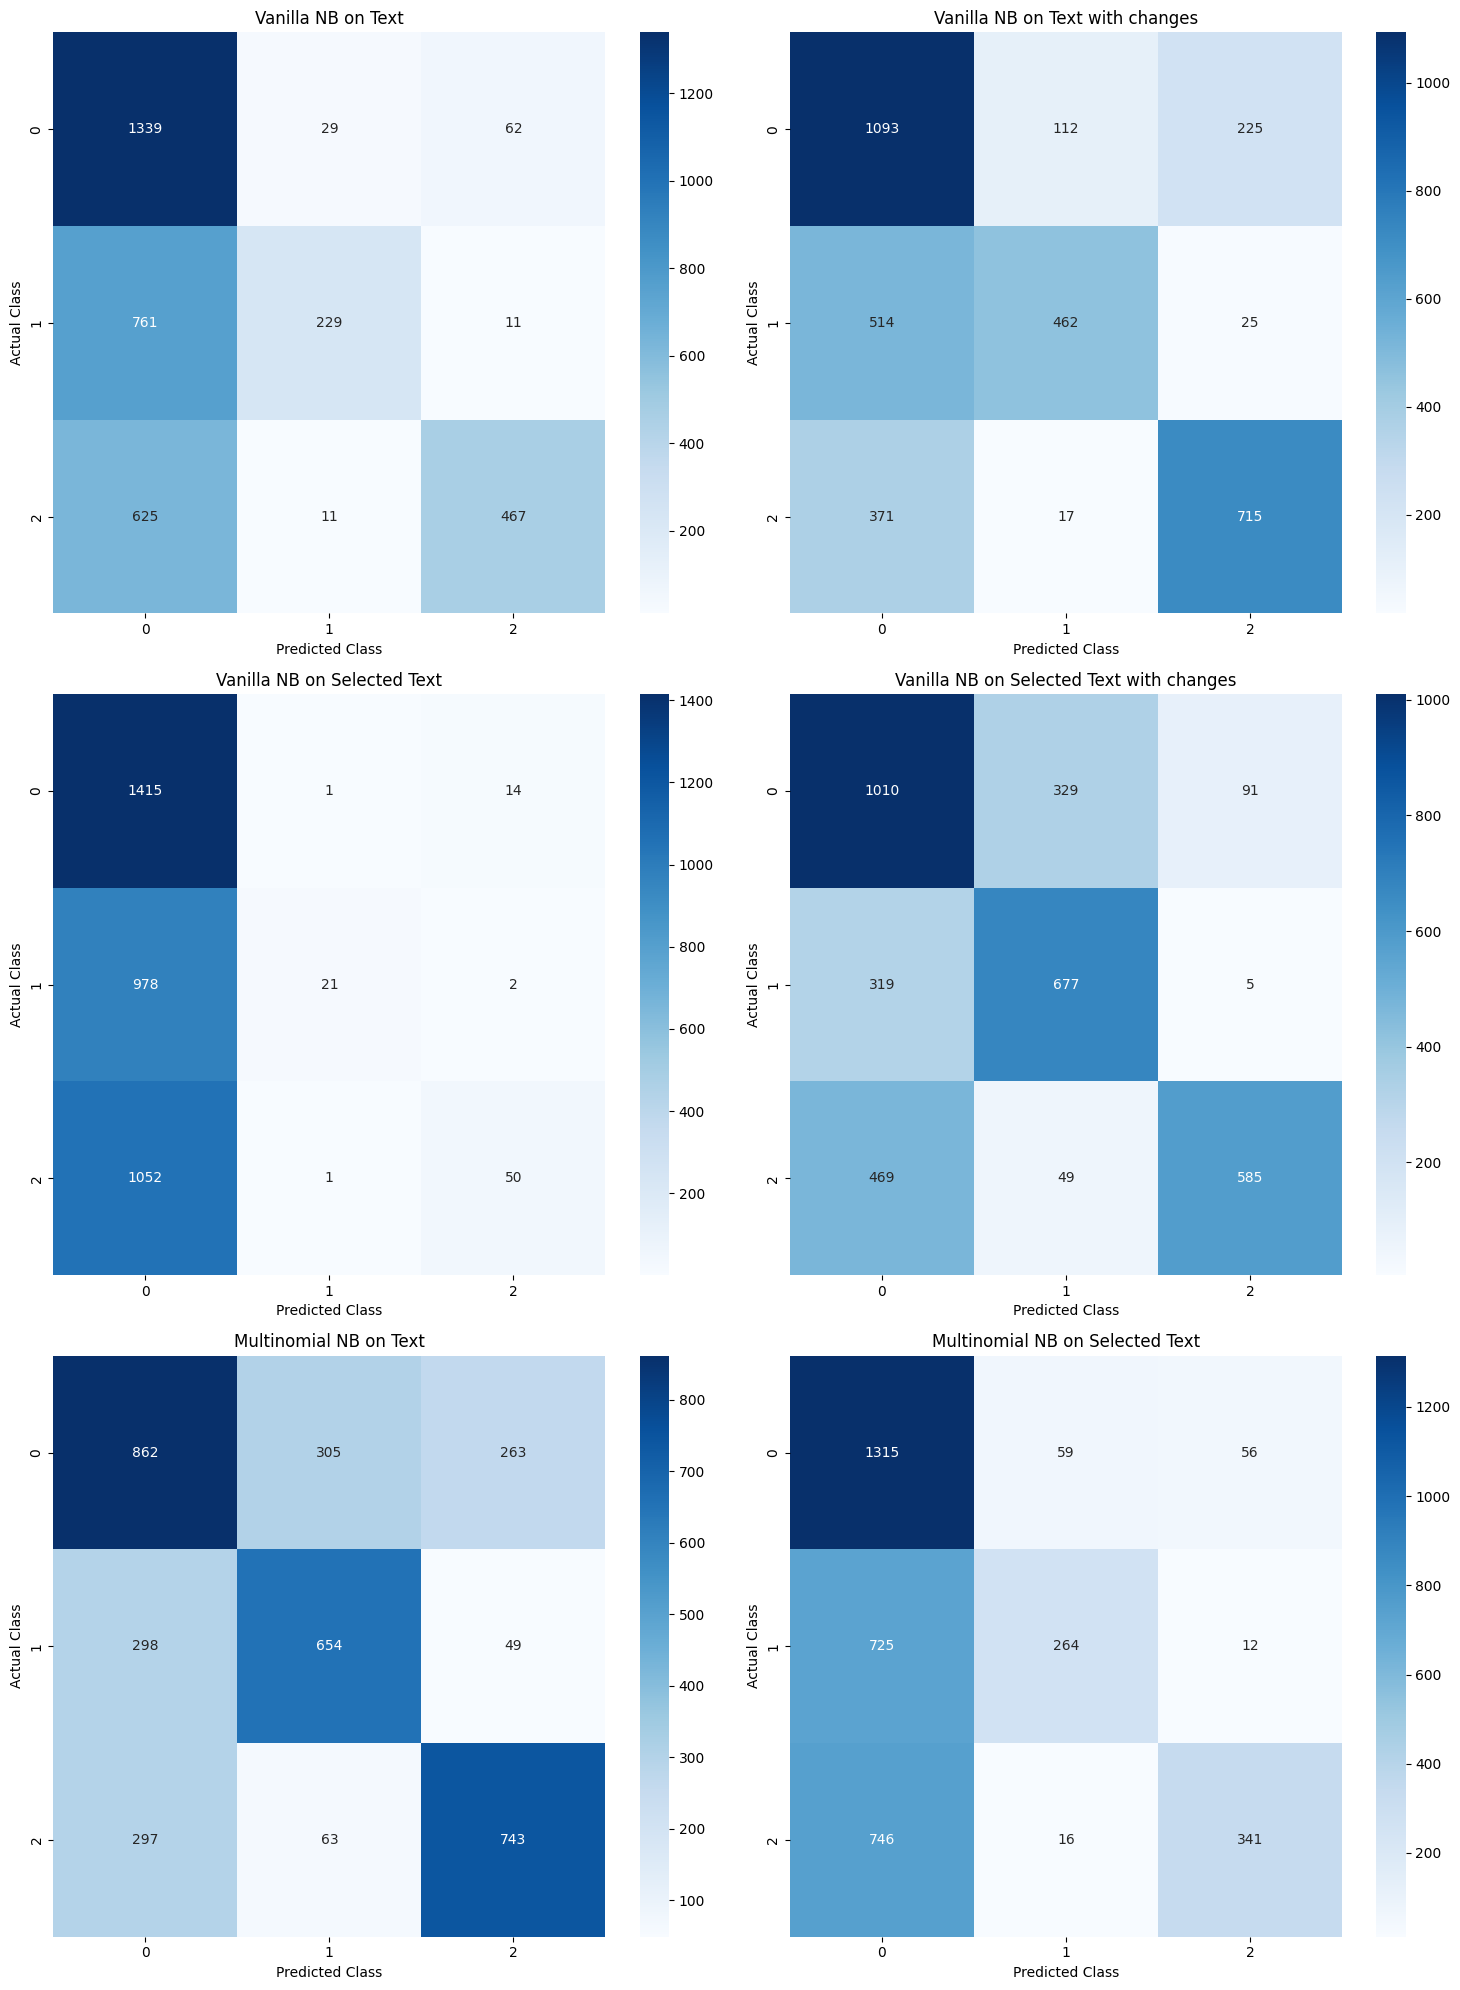

In [45]:
predictions = [y_predict_1, y_predict,  y_predict_sel_1, y_predict_sel,y_predict_multi, y_predict_multi_sel]
titles = ['Vanilla NB on Text', 'Vanilla NB on Text with changes',  'Vanilla NB on Selected Text', 'Vanilla NB on Selected Text with changes','Multinomial NB on Text', 'Multinomial NB on Selected Text']

fig, axs = plt.subplots(3, 2, figsize=(15, 20))

for ax, prediction, title in zip(axs.flatten(), predictions, titles):
    cm = confusion_matrix(y_test, prediction)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted Class')
    ax.set_ylabel('Actual Class')

plt.tight_layout()
plt.show()

In [46]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

label_mapping = {'Neutral': 0, 'Positive': 1, 'Negative': 2}
train_data.replace({'sentiment': label_mapping}, inplace=True)
test_data.replace({'sentiment': label_mapping}, inplace=True)

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_data['text']).toarray()  
y_train = train_data['sentiment']

X_test = vectorizer.transform(test_data['text']).toarray()  
y_test = test_data['sentiment']

gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
print("Gaussian Naive Bayes accuracy: ", accuracy_score(y_test, y_pred_gnb))

mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
print("Multinomial Naive Bayes accuracy: ", accuracy_score(y_test, y_pred_mnb))


Gaussian Naive Bayes accuracy:  0.3842671194114318
Multinomial Naive Bayes accuracy:  0.6247877758913413


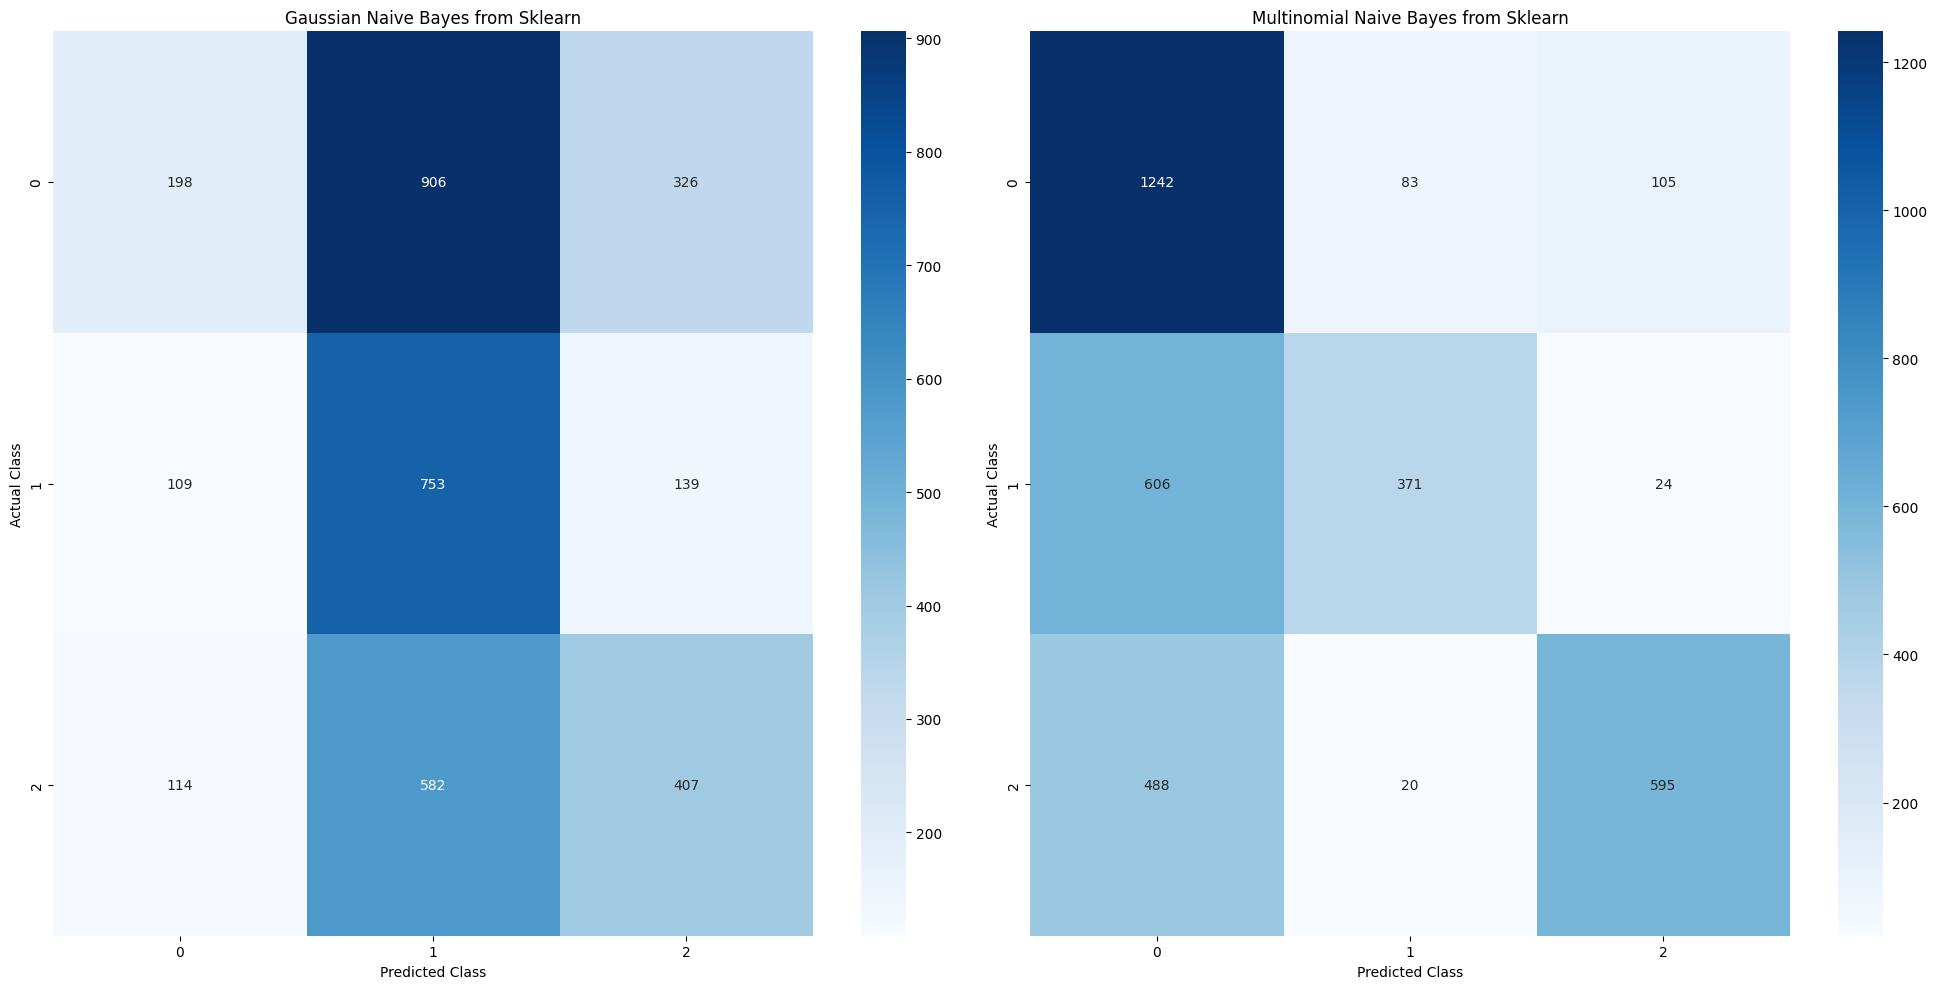

In [47]:
predictions = [y_pred_gnb, y_pred_mnb]
titles = ['Gaussian Naive Bayes from Sklearn', 'Multinomial Naive Bayes from Sklearn']

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

for ax, prediction, title in zip(axs.flatten(), predictions, titles):
    cm = confusion_matrix(y_test, prediction)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted Class')
    ax.set_ylabel('Actual Class')

plt.tight_layout()
plt.show()